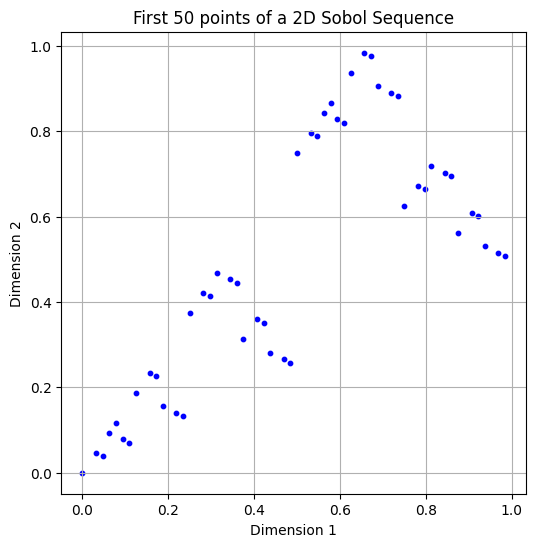

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def sobol_2d_sequence(n, m1, m2, m3, v):
    def generate_direction_numbers(m, v):
        direction_numbers = [v]
        for i in range(1, 32):
            direction_numbers.append(v / (2**i))
        return np.array(direction_numbers)
    
    # Generate direction numbers for both dimensions
    v1 = generate_direction_numbers(m1, v[0])
    v2 = generate_direction_numbers(m2, v[1])
    
    # Compute Sobol sequence
    points = np.zeros((n, 2))
    x1, x2 = 0, 0
    for i in range(n):
        lsb = (i & -i).bit_length() - 1  # Get the least significant bit index
        
        if i == 0:
            x1 ^= int(v1[0] * 2**32)  # Apply initial condition
            x2 ^= int(v2[0] * 2**32)  # Apply initial condition
        else:
            x1 ^= int(v1[lsb] * 2**32)
            x2 ^= int(v2[lsb] * 2**32)
        
        points[i, 0] = x1 / 2**32
        points[i, 1] = x2 / 2**32
    
    return points

# Given initial conditions
m1, m2, m3 = 1, 3, 5
v = [1/2, 3/4, 5/8]

# Generate the first 50 points
n = 50
sobol_points = sobol_2d_sequence(n, m1, m2, m3, v)

# Plot the points
plt.figure(figsize=(6, 6))
plt.scatter(sobol_points[:, 0], sobol_points[:, 1], s=10, color='blue')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("First 50 points of a 2D Sobol Sequence")
plt.grid(True)
plt.show()


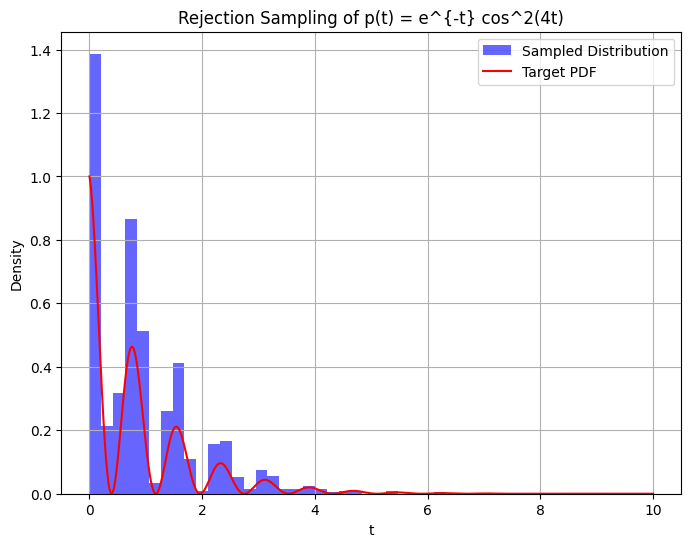

In [ ]:
#now I'll try the rejection sampling

import numpy as np
import matplotlib.pyplot as plt

def target_pdf(t):
    return np.exp(-t) * np.cos(4*t)**2

def rejection_sampling(N, t_max=10, M=1):
    samples = []
    while len(samples) < N:
        t_proposal = np.random.uniform(0, t_max)  # Uniform proposal from [0, t_max]
        p_proposal = np.random.uniform(0, M)  # Uniform value between [0, M]
        
        if p_proposal < target_pdf(t_proposal):
            samples.append(t_proposal)
    
    return np.array(samples)

# Parameters
N = 1000
samples = rejection_sampling(N)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=60, density=True, alpha=0.6, color='b', label='Sampled Distribution')

t_vals = np.linspace(0, 10, 100)
plt.plot(t_vals, target_pdf(t_vals), 'r-', label='Target PDF')

plt.xlabel("t")
plt.ylabel("Density")
plt.title("Rejection Sampling of p(t) = e^{-t} cos^2(4t)")
plt.legend()
plt.grid()
plt.show()


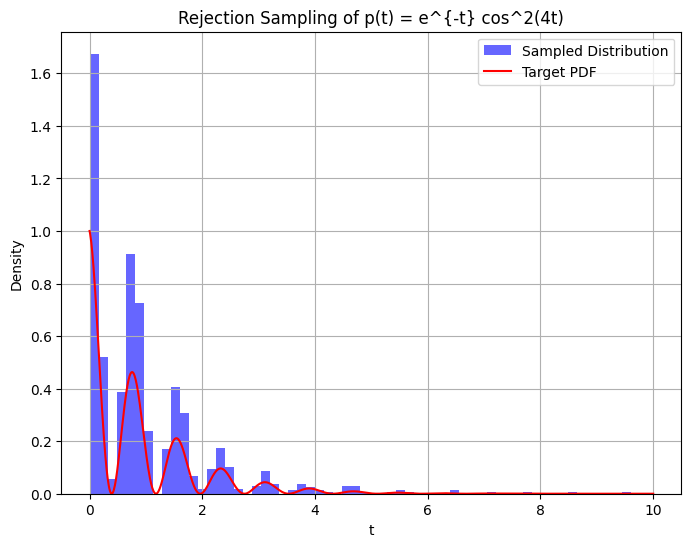

In [17]:
N = 1000
samples = rejection_sampling(N)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=60, density=True, alpha=0.6, color='b', label='Sampled Distribution')

t_vals = np.linspace(0, 10, 1000)
plt.plot(t_vals, target_pdf(t_vals), 'r-', label='Target PDF')

plt.xlabel("t")
plt.ylabel("Density")
plt.title("Rejection Sampling of p(t) = e^{-t} cos^2(4t)")
plt.legend()
plt.grid()
plt.show()

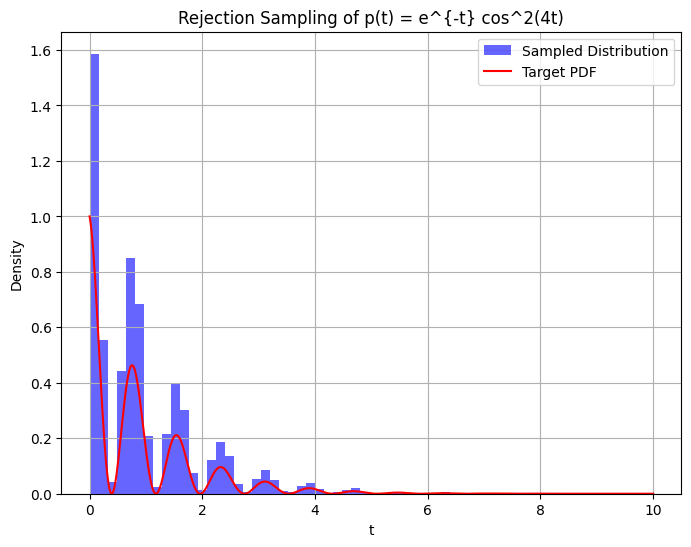

In [18]:
N = 10000
samples = rejection_sampling(N)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=60, density=True, alpha=0.6, color='b', label='Sampled Distribution')

t_vals = np.linspace(0, 10, 1000)
plt.plot(t_vals, target_pdf(t_vals), 'r-', label='Target PDF')

plt.xlabel("t")
plt.ylabel("Density")
plt.title("Rejection Sampling of p(t) = e^{-t} cos^2(4t)")
plt.legend()
plt.grid()
plt.show()

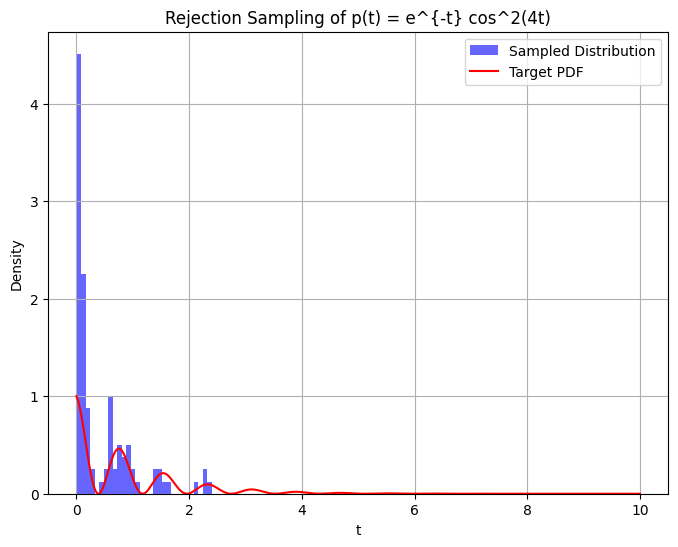

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def target_pdf(t):
    return np.exp(-t) * np.cos(4*t)**2

def rejection_sampling(N, t_max=10, M=1):
    samples = []
    while len(samples) < N:
        t_proposal = np.random.exponential(scale=1)  # Exponential proposal e^(-t)
        p_proposal = np.random.uniform(0, M)  # Uniform value between [0, M]
        
        if p_proposal < target_pdf(t_proposal):
            samples.append(t_proposal)
    
    return np.array(samples)

# Parameters
N = 100
samples = rejection_sampling(N)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=60, density=True, alpha=0.6, color='b', label='Sampled Distribution')

t_vals = np.linspace(0, 10, 1000)
plt.plot(t_vals, target_pdf(t_vals), 'r-', label='Target PDF')

plt.xlabel("t")
plt.ylabel("Density")
plt.title("Rejection Sampling of p(t) = e^{-t} cos^2(4t)")
plt.legend()
plt.grid()
plt.show()


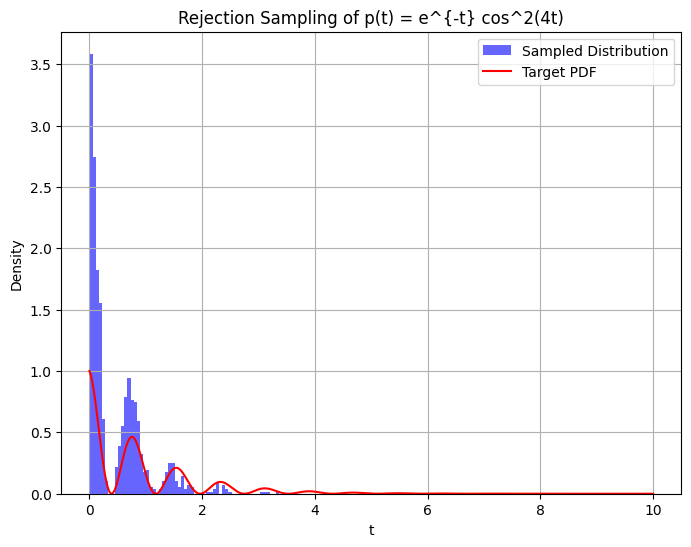

In [20]:
N = 1000
samples = rejection_sampling(N)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=60, density=True, alpha=0.6, color='b', label='Sampled Distribution')

t_vals = np.linspace(0, 10, 1000)
plt.plot(t_vals, target_pdf(t_vals), 'r-', label='Target PDF')

plt.xlabel("t")
plt.ylabel("Density")
plt.title("Rejection Sampling of p(t) = e^{-t} cos^2(4t)")
plt.legend()
plt.grid()
plt.show()

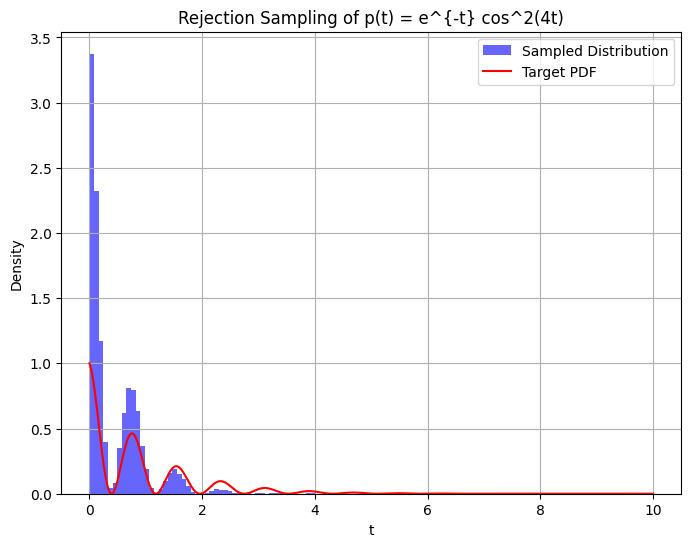

In [21]:
N = 10000
samples = rejection_sampling(N)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=60, density=True, alpha=0.6, color='b', label='Sampled Distribution')

t_vals = np.linspace(0, 10, 1000)
plt.plot(t_vals, target_pdf(t_vals), 'r-', label='Target PDF')

plt.xlabel("t")
plt.ylabel("Density")
plt.title("Rejection Sampling of p(t) = e^{-t} cos^2(4t)")
plt.legend()
plt.grid()
plt.show()

The peak at t=0 grew significantly in this case, which makes sense because we're more likely to sample it. Also, 1000 successes are reached much more quickly.